# Лабораторная работа №2: Моделирование и анализ линейных комбинаций дискретных сигналов

Выполнили студенты гр. 9383 Мосин Константин, Нистратов Дмитрий и Соседков Кирилл. Вариант №6

## Цель работы
Изучить математическое описание линейных комбинаций дискретных гармонических сигналов и овладеть программными средствами их моделирования.

## Основные теоретические положения

Дискретный единичный скачок: $$\sigma_d(k) = \begin{cases}1, k\geq0,\\ 0, k < 0.\end{cases}, k = ..., -2, -1, 0, 1, 2,...$$
Является дискретным аналогом функции единичного скачка (функции Хэвисайда): $$\delta(t)=\begin{cases}1, & \quad t > 0\\0.5\ или\ неопределена, & \quad t = 0\\0, & \quad t < 0\end{cases}$$
Дискретный гармонический сигнал: $$s(k) = Ccos(\hat{w}_0k)$$

 ## Постановка задачи

С помощью программных средств провести моделирование и анализ линейных комбинацций дискретных гармонических последовательностей. Результаты подкрепить соответствующими графиками и выводами.

## Выполнение работы

Пункты работы выполняется с помощью кода.

In [9]:
import numpy as np
import matplotlib.pyplot as plt

In [10]:
Nb = 6
N = 30 + np.mod(Nb, 5)
a = np.power(-1, Nb) * (0.8 + 0.005 * Nb)
C = 1 + np.mod(Nb, 5)
w0 = np.pi / (6 + np.mod(Nb, 5)) 
U = Nb
n0 = 3 + np.mod(Nb, 5)
n_imp = 5 + np.mod(Nb, 5)
B1 = 1.5 + np.mod(Nb, 5)
B2 = 5.7 - np.mod(Nb, 5)
B3 = 2.2 + np.mod(Nb, 5)
w1 = np.pi / (4 + np.mod(Nb, 5)) 
w2 = np.pi / (8 + np.mod(Nb, 5)) 
w3 = np.pi / (16 + np.mod(Nb, 5))
a1 = 1.5 - np.mod(Nb, 5)
a2 = 0.7 + np.mod(Nb, 5)
a3 = 1.4 + np.mod(Nb, 5)

### Пункт 1
Смоделировать дискретный прямоугольный импульс: $$s_1(k)=\begin{cases}U, & n_0\leqslant k \leqslant n_0+n_{imp}-1;\\0, & иначе\end{cases}$$ 
на основе дискретного единичного скачка $\sigma_d(k)$ из л/р №1 с выводом графика на интервале времени $n\in[0,N-1]$. Пояснить как выполняется моделирование импульса.

Для моделирования прямоугольного импульса начиная с номера $n_0$ последовательности $s_1(k)$ включается дискретный единичный скачок $\sigma_d(k)$ с амплитудой $U$ и длительностью $n_{imp}$

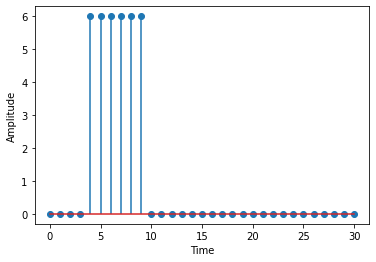

In [18]:
sigma_d = lambda k: k >= 0
s1 = lambda k: U * sigma_d(k) if k >= n0 and n0 + n_imp - 1 >= k else 0
n = np.linspace(0, N - 1, N)

plt.stem(n, np.array([s1(k) for k in n]))
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()

### Пункт 2
Смоделировать линейную комбинацию дискретных гармонических сигналов $s_2(k)$:

$$s_2(k)=a_1x_1(k)+a_2x_2(k)+a_3x_3(k)$$

где

$$x_i(k)=B_isin(\hatω_ik),i=1,2,3$$

с выводом графиков последовательностей $x_i(k)$ и $s_2(k)$ на интервале времени $n \in [0,5N−1]$. Вычислить среднее значение (идентификатор mean_s2), энергию (идентификатор E) и среднюю мощность последовательности $s_2(k)$ (идентификатор P). Пояснить:

a. операции при моделировании линейной комбинации сигналов $s_2(k)$ 

сумма гармонических сигналов каждый из которых домножается на константу

b. как определяют указанные характеристики

$$ means2 = \frac{1}{n}\sum_{i=0}^n s_2(i)$$
$$E = \sum_{i=0}^n s_2(i)^2 $$
$$P = \frac {E}{n} $$

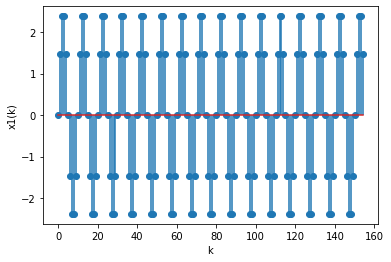

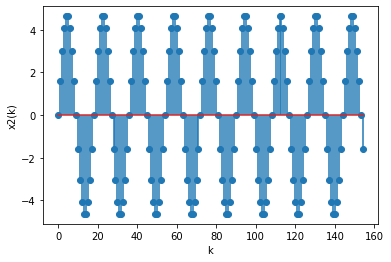

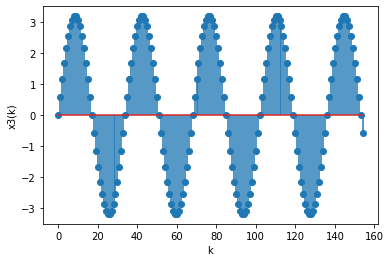

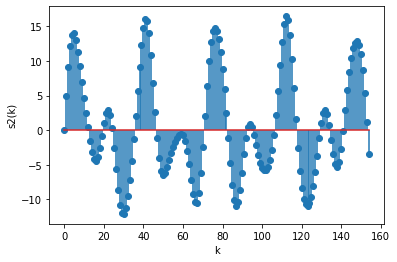

In [12]:
import numpy as np
import matplotlib.pyplot as plt 

x1 = lambda k: B1*np.sin(w1*k)
x2 = lambda k: B2*np.sin(w2*k)
x3 = lambda k: B3*np.sin(w3*k)
s2 = lambda k: a1*x1(k) + a2*x2(k) + a3*x3(k)

k = np.arange(0, 5*N)

plt.stem(k, x1(k))
plt.ylabel("x1(k)")
plt.xlabel("k")
plt.show()

plt.stem(k, x2(k))
plt.ylabel("x2(k)")
plt.xlabel("k")
plt.show()

plt.stem(k, x3(k))
plt.ylabel("x3(k)")
plt.xlabel("k")
plt.show()

plt.stem(k, s2(k))
plt.ylabel("s2(k)")
plt.xlabel("k")
plt.show()

In [13]:
s2_k = s2(k)
mean_s2 = np.mean(s2_k)
E = sum(s2_k**2)
P = E/len(s2_k)

print(mean_s2, E, P)

0.8251426335869714 9493.592607246532 61.24898456288085


Среднее значение: 0.8251

Энергия: 9493.5926

Мощность: 61.2489

### Пункт 3
Вывести график дискретного сигнала $s_3(k)$ представляющего собой дискретный гармонический сигнал $s(k)$
$$s(k) = Ccos(\hat{w}_0k)$$
с экспоненциальной огибающей $|a|^k$, на интервале времени $n \in [0, (N - 1)]$. Привести аналитическую формулу дискретного сигнала $s_3(k)$ и пояснить операции при его моделировании.
$$s_3(k) = |a|^k * s(k)$$
Для промежутка времени $n \in [0, (N - 1)]$ вычислим значения функции $s(k)$ и огибающую (envelope). 

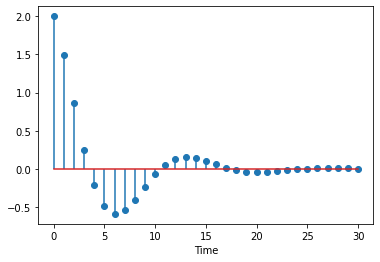

In [16]:
time = np.linspace(0, (N - 1), N) # временной промежуток от 0 до (N-1)
sk = np.array([C*np.cos(w0*k) for k in time])

envelope = np.array([np.power(np.abs(a), k) for k in time])

s3 = np.array(sk * envelope)
plt.stem(time, s3)
plt.xlabel("Time")
plt.show()

### Пункт 4
Вывести график пяти периодов периодической последовательности $s_4(k)$ дискретных прямоугольных импульсов амплитуды $U$ и длительности $n_{imp}$ с периодом, вдвое большим длительности импульса. Пояснить операции при моделировании периодической последовательности.

Для моделирования периодической последовательности справедливо $$s(k) = s(k + nT),\ n \in \mathbb{Z},\ T - период.$$В данном случае $$s_4(k) = \begin{cases}U, & k \mod 3n_{imp} < n_{imp}\\0 & иначе\end{cases}$$

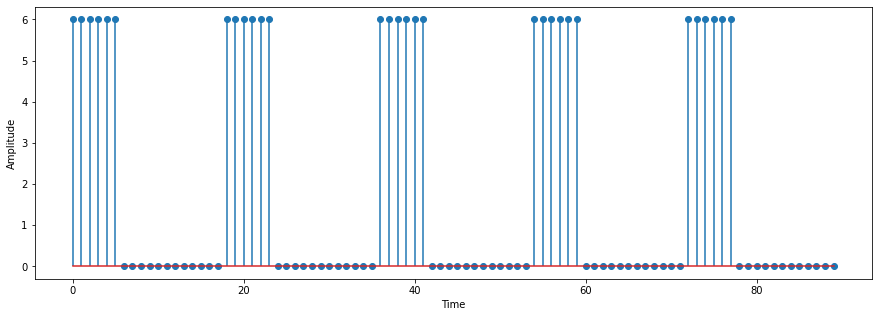

In [17]:
s4 = lambda k: U * sigma_d(k) if k%(n_imp * 3) < n_imp else 0
n = np.linspace(0, 89, 90) # 6 * 5 + 12 * 5 = 90

plt.figure(figsize=(15, 5))
plt.stem(n, np.array([s4(k) for k in n]))
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()

### Выводы

В ходе выполнения лабораторной работы было изучено математическое описание линейных комбинаций дискретных гармонических сигналов, смоделированы: дискретный прямоугольный импульс на основе дискретного единичного скачка, линейная комбинация дискретных гармонических сигналов. Также были выведены графики следующих моделей: дискретный гармоничный сигнал с экпоненциальной огибающей, пять периодов переодической последовательности дискретных прямоугольных импульсов.С помощью програмных средств языка python были проведены рассчеты и визуализация графиков моделей.